# Iris Flowers Classification ML Project

__Aim__ : To predict which class of sample based on different Features.

__Type__ : MultiClass Classification Model

__Models used__ : Support Vector Classifier(SVC), K-Nearest Neighbours(KNN), Decision Tree Classifier (CART), Random Forest Classifier(RFC), Guassian Naive Bayes(GNB)

__Level__ : Beginner-project1

__Task__ : 1

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
warnings.filterwarnings('ignore')

In [2]:
#loading dataset

df=pd.read_csv('IRIS.csv')
df.head()  # first 5 samples


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Dimensions of data

print('shape:',df.shape)
print('size:',df.size)
print('coulmns:',len(df.columns))
print(df.columns)

shape: (150, 5)
size: 750
coulmns: 5
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [4]:
# Information about Features (dtypes,entries,null values,space)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
# Descriptive Statistics about data 

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exploratory Data Analysis (EDA)

__Data Visualisation__

__Preprocessing__

__Feature Engineering__

__Feature Selection__

In [6]:
# Covriance Matrix (Direction)
df.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


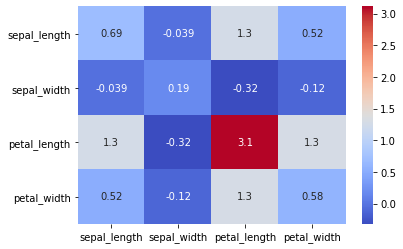

In [7]:
# visualising Covariance Matrix using Heatmap

sns.heatmap(df.cov(),annot=True,cmap='coolwarm')
plt.show()

In [8]:
# Correlation Matrix (Relationship and Direction)
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


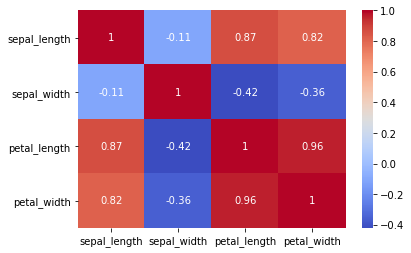

In [9]:
# visualising Correlation Matrix using Heatmap

sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

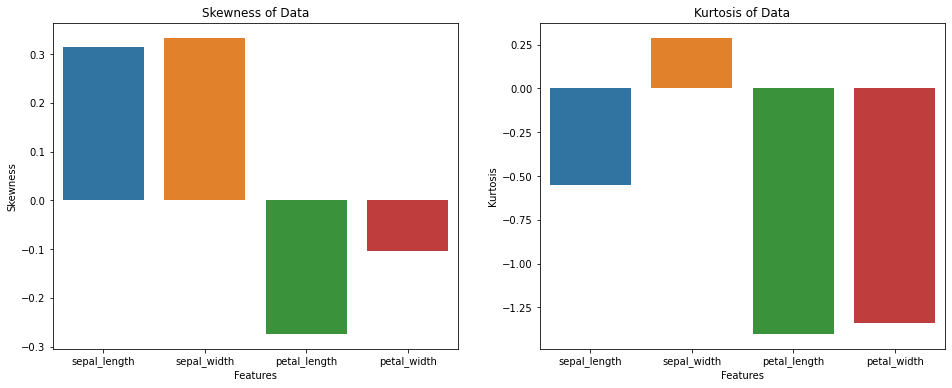

In [10]:
# Skewness and Kurtosis (Measure of Distribution of data)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(df.skew().keys(),df.skew().values)
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.title('Skewness of Data')
plt.subplot(1,2,2)
sns.barplot(df.kurtosis().keys(),df.kurtosis().values)
plt.xlabel('Features')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of Data')
plt.show()

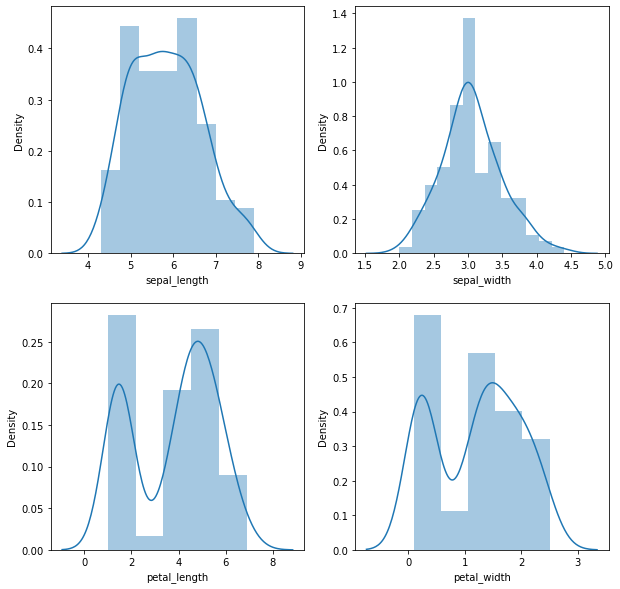

In [11]:
# Univariate Analysis of Features

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df.sepal_length,kde=True)
plt.subplot(2,2,2)
sns.distplot(df.sepal_width,kde=True)
plt.subplot(2,2,3)
sns.distplot(df.petal_length,kde=True)
plt.subplot(2,2,4)
sns.distplot(df.petal_width,kde=True)
plt.show()

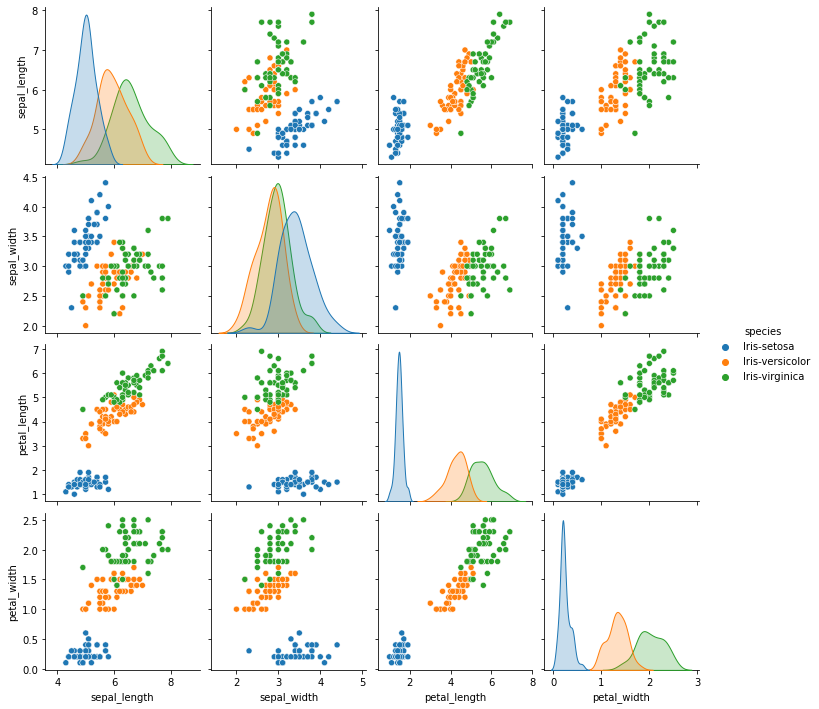

In [12]:
# MultiVariate Analysis
sns.pairplot(df,hue='species') #PairGrid
plt.show()

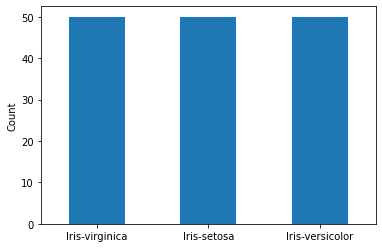

In [13]:
# Checking Balance in Data using countplot

df['species'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

In [14]:
# Null Values
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [15]:
# Duplicate Values
df.duplicated().sum()

3

In [16]:
# Dropping Duplicate Values

print('Shape before dropping duplicates :',df.shape) 
df.drop_duplicates(inplace=True)
print('Shape after dropping duplicates  :',df.shape) 

Shape before dropping duplicates : (150, 5)
Shape after dropping duplicates  : (147, 5)


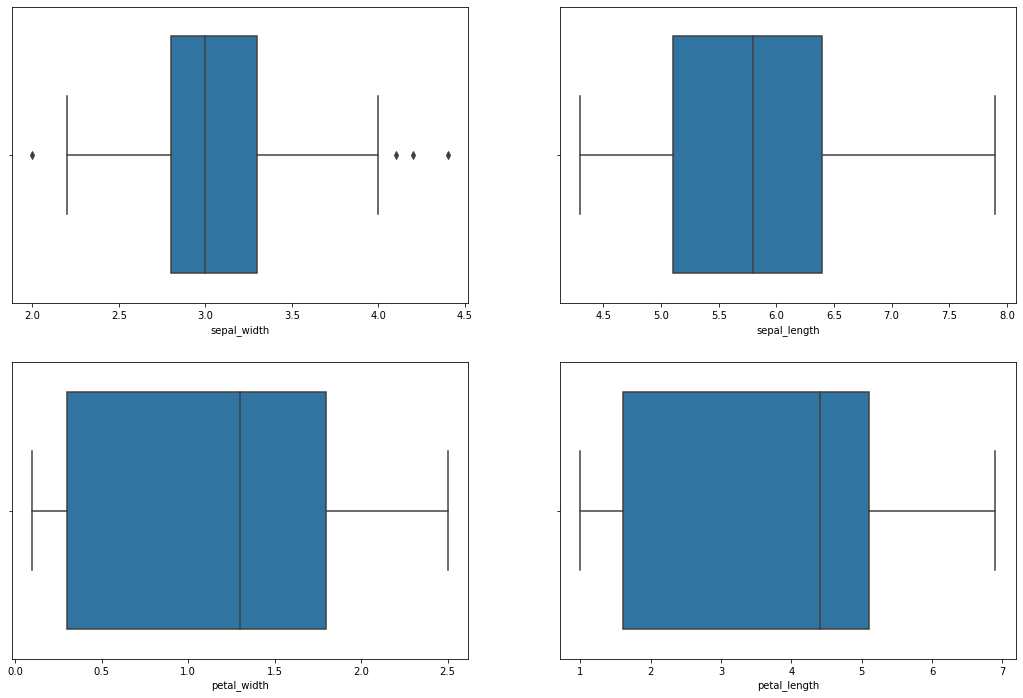

In [17]:
# Outier detection using Boxplot

plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.boxplot(df['sepal_width'])
plt.subplot(2,2,2)
sns.boxplot(df['sepal_length'])
plt.subplot(2,2,3)
sns.boxplot(df['petal_width'])
plt.subplot(2,2,4)
sns.boxplot(df['petal_length'])
plt.show()

__From above plot, we can see that sepal_width feature contain 4 outliers.__

In [18]:
# Outlier Removal using IQR

Q3=np.percentile(df.sepal_width,75)
Q1=np.percentile(df.sepal_width,25)
IQR=Q3-Q1
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)
samples_before=df.shape[0]
df=df[(df['sepal_width']>lower_bound ) & (df['sepal_width']<upper_bound)]
samples_after=df.shape[0]
print(f'{samples_before-samples_after} outliers found and removed.')

4 outliers found and removed.


In [19]:
# converting class label from Categorical to Numerical using LabelEncoding Technique

le=LabelEncoder()
df['species']=le.fit_transform(df[['species']])
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
99,5.7,2.8,4.1,1.3,1
96,5.7,2.9,4.2,1.3,1
124,6.7,3.3,5.7,2.1,2
69,5.6,2.5,3.9,1.1,1
90,5.5,2.6,4.4,1.2,1


In [20]:
X=df.drop('species',axis=1)
y=df['species']

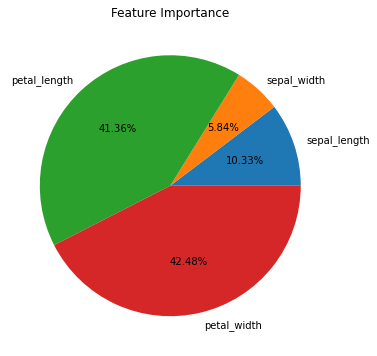

In [21]:
# Individual Feature importance in Predicting Target

ETC=ExtraTreesClassifier()
ETC.fit(X,y)
plt.figure(figsize=(6,6))
plt.pie(x=ETC.feature_importances_,labels=df.columns[:-1],autopct='%0.2f%%')
plt.title('Feature Importance')
plt.show()

# Model Building 

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)
print('xtrain:',xtrain.shape)
print('ytrain:',ytrain.shape)
print('xtest :',xtest.shape)
print('ytrain:',ytest.shape)

xtrain: (114, 4)
ytrain: (114,)
xtest : (29, 4)
ytrain: (29,)


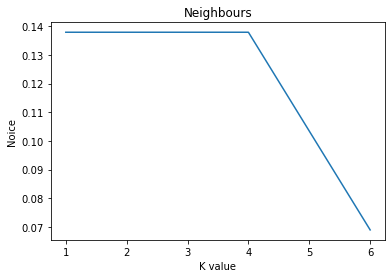

In [23]:
# K value selction for KNN 

neighbours= list(range(1,7))
noice=[]
for k in neighbours :
    KNN=KNeighborsClassifier(n_neighbors=k).fit(xtrain,ytrain)
    ypred=KNN.predict(xtest)
    noice.append(np.mean(ypred!=ytest))
sns.lineplot(neighbours,noice)
plt.xlabel('K value')
plt.ylabel('Noice')
plt.title('Neighbours')
plt.show()

In [24]:
models=( ['SVC ',SVC()],['CART',DecisionTreeClassifier()],['RFC ',RandomForestClassifier()],
         ['GNB ',GaussianNB()],['KNN ',KNeighborsClassifier(n_neighbors=6)] )

cross_val_scores=[]
test_scores=[]
model_names=[]
print('Training Accuracy \n')
for model_name,model in models:
    model=model.fit(xtrain,ytrain)
    model_names.append(model_name)
    cross_val_scores.append(np.mean(cross_val_score(model,xtrain,ytrain,cv=3)))
    print(model_name,':',np.mean(cross_val_score(model,xtrain,ytrain,cv=3)))
    
print('\nTesting Accuracy \n')
    
for model_name,model in models:
    ypred=model.predict(xtest)
    test_scores.append(accuracy_score(ypred,ytest))
    print(model_name,':',accuracy_score(ypred,ytest))
    
       

Training Accuracy 

SVC  : 0.9736842105263158
CART : 0.9649122807017544
RFC  : 0.9649122807017544
GNB  : 0.9736842105263158
KNN  : 0.9736842105263158

Testing Accuracy 

SVC  : 0.896551724137931
CART : 0.896551724137931
RFC  : 0.896551724137931
GNB  : 0.896551724137931
KNN  : 0.9310344827586207


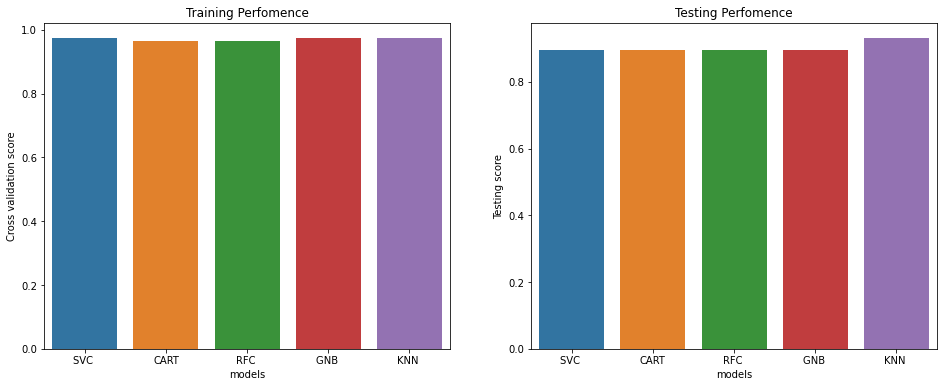

In [25]:
# Visualisation of Model Perfomence

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(model_names,cross_val_scores)
plt.ylabel('Cross validation score')
plt.xlabel('models')
plt.title('Training Perfomence')
plt.subplot(1,2,2)
sns.barplot(model_names,test_scores)
plt.ylabel('Testing score')
plt.xlabel('models')
plt.title('Testing Perfomence')
plt.show()

# CONCLUSION

__From above plot we can see all models are performing well as this is a dataset with less samples__

__But KNN is performing better on both validation and test data__

# MODEL EVALUATION

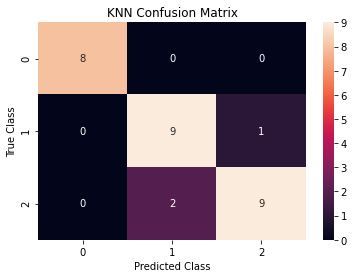

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.82      0.90      0.86        10
           2       0.90      0.82      0.86        11

    accuracy                           0.90        29
   macro avg       0.91      0.91      0.90        29
weighted avg       0.90      0.90      0.90        29



In [26]:
KNN=KNeighborsClassifier().fit(xtrain,ytrain)
ypred=KNN.predict(xtest)

sns.heatmap(confusion_matrix(ypred,ytest),annot=True)   # Confusion Matrix
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('KNN Confusion Matrix')
plt.show()

print(classification_report(ypred,ytest)) # Classification Report

# INFERENCE

In [27]:
sepal_length=float(input(' Enter Sepal Length : '))
sepal_width=float(input (' Enter Sepal Width  : '))
petal_length=float(input(' Enter Petal Length : '))
petal_width=float(input (' Enter Petal Width  : '))

data=[sepal_length,petal_length,sepal_width,petal_width]

def predict_class(data):
    target=KNN.predict([data])[0]
    if target==0:
        return 'Iris-setosa'
    elif target==1:
        return 'Iris-versicolor'
    else:
        return 'Iris-virginica'
    
predict_class(data)

 Enter Sepal Length : 5.5
 Enter Sepal Width  : 4
 Enter Petal Length : 4
 Enter Petal Width  : 0.7


'Iris-versicolor'